# Práctica Día 1: Introducción a las Series Temporales

En este notebook, aprenderemos a trabajar con datos de series temporales en Python. Veremos:

1. Configuración del entorno.
2. Configuración e importaciones
3. Creación de un dataset de ejemplo (o carga de un dataset real).
4. Exploración y descripción de los datos.
5. Visualización básica (line plot).
6. Descomposición de la serie.
7. Resampleo (agregación por periodo).
8. Tarea para los estudiantes.

## 1. Configuración del entorno

### Instalar python

#### Windows


- Descarga el instalador desde la web oficial:
🔗 https://www.python.org/downloads/windows/
- Ejecuta el instalador python-XYZ.exe y marca la casilla "Add Python to PATH".
- Haz clic en "Install Now".
- Verifica la instalación abriendo CMD y ejecutando:
```sh
python --version
```

#### Linux

```sh
sudo apt update && sudo apt install python3 python3-pip -y

python3 --version
```

### Anaconda / Conda (Windows, Linux, Mac)

```sh
conda create --name time_series_course python=3.10

conda activate time_series_course

conda install numpy pandas matplotlib

conda deactivate
```

### Entorno virtual python

#### Windows

```sh
py --version

python -m venv time_series_course

py -m venv time_series_course

time_series_course\Scripts\activate

pip install -r requirements.txt

deactivate
```

#### Linux / Mac

```sh
python3 -m venv time_series_course

. time_series_course/bin/activate

pip install -r requirements.txt

deactivate
```

## 2. Configuración e importaciones

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes para que las gráficas se vean bien en el notebook
%matplotlib inline
sns.set_style('whitegrid')

print("Entorno de trabajo configurado.")

Entorno de trabajo configurado.


## 3 y 4. Creación de un dataset de ejemplo (o carga de un dataset real) y Exploración.

En esta parte, generaremos un dataset de ejemplo con:
- Un índice de fechas (1 año completo de datos, por ejemplo).
- Una columna que represente una métrica (p.ej. consumo energético, ventas, etc.).
- Una posible estacionalidad y tendencia simuladas.

Si deseas usar un dataset real, reemplaza el siguiente bloque de código por:
```python
# df = pd.read_csv('ruta_a_tu_dataset.csv', parse_dates=['columna_de_fecha'], index_col='columna_de_fecha')


In [7]:
# Sección 1: Generación de datos simulados

# Creamos un rango de fechas diario en 2024
date_rng = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Simulamos tendencia y estacionalidad
# Tendencia: vamos a aumentar el valor con el paso de los días
# Estacionalidad: crearemos un patrón mensual

np.random.seed(42)  # Fijamos semilla para resultados reproducibles

# Longitud del rango de fechas
n = len(date_rng)

# Simulamos una tendencia lineal: por ejemplo, inicia en 100 y aumenta un poco cada día
trend = 100 + np.arange(n) * 0.1  # La pendiente es 0.1 por día

# Creamos una estacionalidad mensual, usando una onda sinusoidal con periodo ~30 días
seasonality = 10 * np.sin(2 * np.pi * np.arange(n) / 30)

# Ruido aleatorio
noise = np.random.normal(0, 5, n)

# Serie final = tendencia + estacionalidad + ruido
values = trend + seasonality + noise

# Creamos el DataFrame
df = pd.DataFrame({'Consumo': values}, index=date_rng)

# Revisamos las primeras filas
df.head()

,Consumo
2024-01-01,102.483571
2024-01-02,101.487795
2024-01-03,107.505809
2024-01-04,113.793002
2024-01-05,106.660681


Observamos que:
- El índice son fechas diarias (`DatetimeIndex`).
- Tenemos una sola columna llamada `consumo`.

In [8]:
# Verificamos la estructura
print("Dimensiones del DataFrame:", df.shape)
df.info()


Dimensiones del DataFrame: (366, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-01 to 2024-12-31
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Consumo  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [10]:
# Descripción estadística de los datos
df.describe()

,Consumo
count,366.000000
mean,118.370935
std,13.589101
min,85.231040
25%,108.088660
50%,118.200654
75%,128.229802
max,147.282168


## 5. Visualización básica (line plot).

Haremos un gráfico de líneas para ver la evolución de la columna `consumo` a lo largo del tiempo.

<Figure size 1200x500 with 0 Axes>

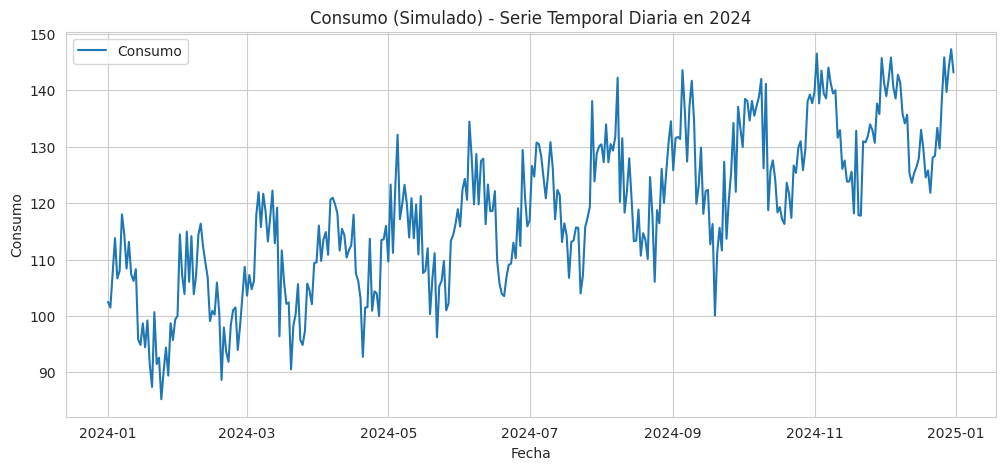

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Consumo'], label='Consumo')
plt.title('Consumo (Simulado) - Serie Temporal Diaria en 2024')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.show()

Podemos ya observar una tendencia creciente (ligera) y algunas fluctuaciones que podrían corresponder a la estacionalidad introducida, además de ruido aleatorio.

## 6. Descomposición de la serie.

Statsmodels proporciona métodos para descomponer una serie en sus componentes principales:
- Tendencia
- Estacionalidad
- Ruido (o residuales)

*Nota:* Esta parte es opcional si todavía no se ha introducido Statsmodels. Pero sirve para ilustrar cómo ver visualmente cada componente.

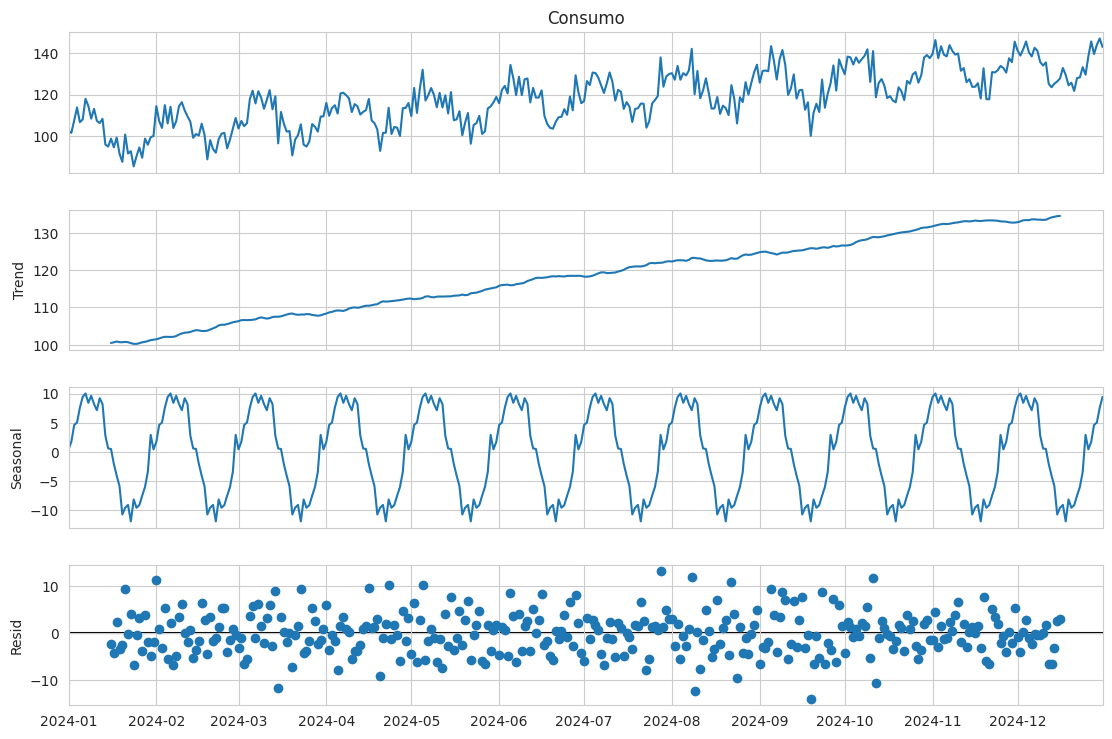

In [14]:
import statsmodels.api as sm

# Para series diarias con estacionalidad mensual, establecemos period ~ 30
decomposition = sm.tsa.seasonal_decompose(df['Consumo'], model='additive', period=30)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

En la gráfica resultante, veremos:

- **Observed** (la serie original)
- **Trend** (la tendencia estimada)
- **Seasonal** (el patrón estacional aproximado)
- **Resid** (la parte que queda sin explicar, es decir, el ruido)


## 7. Resampleo (agregación por periodo).

Supongamos que ahora queremos observar un promedio semanal o un total semanal de `consumo`. Podemos usar la función `resample` de Pandas.

In [15]:
# Sección 7: Resampleo
# Agrupamos por semana la media de consumo

df_weekly = df.resample('W').mean()  # 'W' indica resample semanal
df_weekly.head()


,Consumo
2024-01-07,108.275294
2024-01-14,107.662600
2024-01-21,95.237248
2024-01-28,91.708588
2024-02-04,105.079597


<Figure size 1200x500 with 0 Axes>

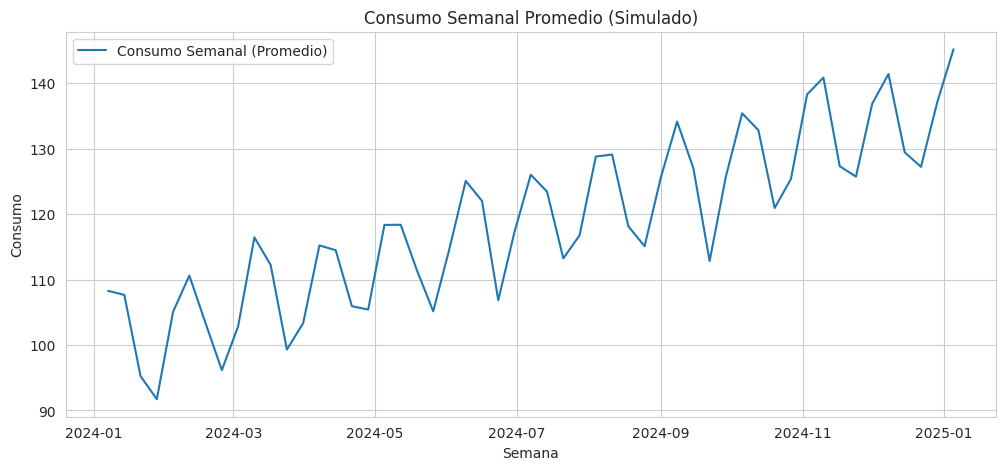

In [17]:
# Visualización de la serie semanal
plt.figure(figsize=(12, 5))
plt.plot(df_weekly.index, df_weekly['Consumo'], label='Consumo Semanal (Promedio)')
plt.title('Consumo Semanal Promedio (Simulado)')
plt.xlabel('Semana')
plt.ylabel('Consumo')
plt.legend()
plt.show()

Observa cómo al agrupar (resample) por semana:
- Se suavizan un poco las fluctuaciones diarias.
- Se puede apreciar la tendencia con menos ruido.

## 8. Tarea para los estudiantes.

### Conclusiones
- Hemos creado (o cargado) un dataset con fechas como índice.
- Exploramos la estructura (shape, info, describe).
- Graficamos la serie temporal para identificar posibles patrones (tendencia, estacionalidad, ruido).
- Vimos un ejemplo de descomposición usando `statsmodels`.
- Realizamos un resampleo semanal para suavizar y observar mejor la tendencia.

### Tarea

1. **Buscar un dataset de series temporales** (real) en alguna fuente pública (Kaggle, datos abiertos, etc.) o usar uno proporcionado por el profesor.
2. **Cargar el dataset** en un DataFrame con `parse_dates` y `index_col` (o convertir la columna de fecha a `datetime`).
3. **Explorar**:
   - Dimensiones, tipos de datos (`.info()`, `.dtypes`).
   - Estadísticas descriptivas (`.describe()`).
4. **Visualizar** la columna principal (o columnas) en un gráfico de líneas.
5. **Interpretar** si hay tendencia o estacionalidad aparente.
6. **(Opcional)** Aplicar descomposición estacional y comentar los hallazgos.
7. **(Opcional)** Hacer un resampleo diario, semanal o mensual para comparar.

¡Felicidades! Con esto concluye la práctica del Día 1.
